# Switched
## testing data and training data are switched

In [2]:
from import_data import VectorFetcher
from tf import TensorflowNN

vf = VectorFetcher(["test"])

['test']


In [3]:
trainingData = {}
trainingData["X"] = vf.get_vectors(["shakespeare","marlowe"], "train")
trainingData["Y"] = [1,1,1,1,0,0,0]

In [4]:
import pandas as pd

pd.DataFrame.from_dict(trainingData)

,X,Y
0,"(0, 388)\t1\n (0, 402)\t3\n (0, 403)\t4\n ...",1
1,"(0, 388)\t1\n (0, 402)\t3\n (0, 403)\t4\n ...",1
2,"(0, 388)\t1\n (0, 402)\t3\n (0, 403)\t4\n ...",1
3,"(0, 388)\t1\n (0, 402)\t3\n (0, 403)\t4\n ...",1
4,"(0, 388)\t1\n (0, 402)\t3\n (0, 403)\t4\n ...",0
5,"(0, 388)\t1\n (0, 402)\t3\n (0, 403)\t4\n ...",0
6,"(0, 388)\t1\n (0, 402)\t3\n (0, 403)\t4\n ...",0


In [5]:
testingData = {}
testingData["X"] = vf.get_vectors(["shakespeare","marlowe"], "test")
testingData["Y"] = [1,1,1,1,0,0,0]

pd.DataFrame.from_dict(testingData)

,X,Y
0,"(0, 390)\t2\n (0, 398)\t1\n (0, 406)\t19\n...",1
1,"(0, 390)\t2\n (0, 398)\t1\n (0, 406)\t19\n...",1
2,"(0, 390)\t2\n (0, 398)\t1\n (0, 406)\t19\n...",1
3,"(0, 390)\t2\n (0, 398)\t1\n (0, 406)\t19\n...",1
4,"(0, 390)\t2\n (0, 398)\t1\n (0, 406)\t19\n...",0
5,"(0, 390)\t2\n (0, 398)\t1\n (0, 406)\t19\n...",0
6,"(0, 390)\t2\n (0, 398)\t1\n (0, 406)\t19\n...",0


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

models = [
    LogisticRegression(),
    RandomForestClassifier(),
    MultinomialNB(),
    SVC(gamma="auto"),
    LinearSVC(),
    TensorflowNN(trainingData["X"].shape[1])
]

import time

for i in range(0, len(models)):
    models[i].fit(testingData["X"], testingData["Y"])
    time.sleep(1)

Instructions for updating:
Colocations handled automatically by placer.


/home/workexp/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/workexp/.local/lib/python3.5/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/workexp/.local/lib/python3.5/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Instructions for updating:
Use tf.cast instead.


In [7]:

accuracy = [model.score(trainingData["X"], trainingData["Y"]) * 100 for model in models]
model_labels = [model.__class__.__name__ for model in models]


7/7 [==============================] - 0s 7ms/sample - loss: 6.8701 - acc: 0.5714


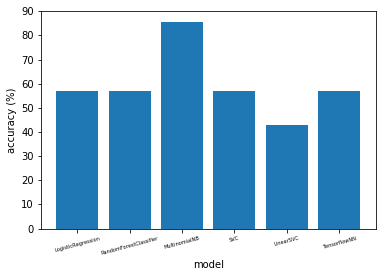

In [12]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

ind = index = np.arange(len(model_labels))
plt.bar(ind, accuracy)
plt.xlabel("model", fontsize=10)
plt.ylabel("accuracy (%)", fontsize=10)
plt.xticks(ind, model_labels, rotation=15, fontsize=5)

plt.savefig("modelsf1.png", dpi=500)
plt.show()

In [9]:

def predict(model):
    predictions = model.predict(trainingData["X"])

    for i in range(0, len(predictions)):
        authors = ["marlowe", "shakespeare"]
        prediction = authors[predictions[i]]
        actual_author = authors[trainingData["Y"][i]]
        print("Actual author:", actual_author, "- Predicted author:", prediction)

In [10]:
predict(models[2])

Actual author: shakespeare - Predicted author: shakespeare
Actual author: shakespeare - Predicted author: shakespeare
Actual author: shakespeare - Predicted author: shakespeare
Actual author: shakespeare - Predicted author: marlowe
Actual author: marlowe - Predicted author: marlowe
Actual author: marlowe - Predicted author: marlowe
Actual author: marlowe - Predicted author: marlowe


### in this case the multinomial naive bayes has the greatest accuracy 
#### with training and test data the correct way around the naive bayes had an accuracy of 60%

In [11]:
def savemodels():

    from joblib import dump
    import datetime

    for model in models:
        dump(model, model.__class__.__name__ + ".model")